# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Database ini

In [4]:
SAMPLE = 'D070B1N7'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

In [ ]:


show_df(full_table, 
         find = SAMPLE
         )

# Report

## Overview IVC

<IPython.core.display.Javascript object>


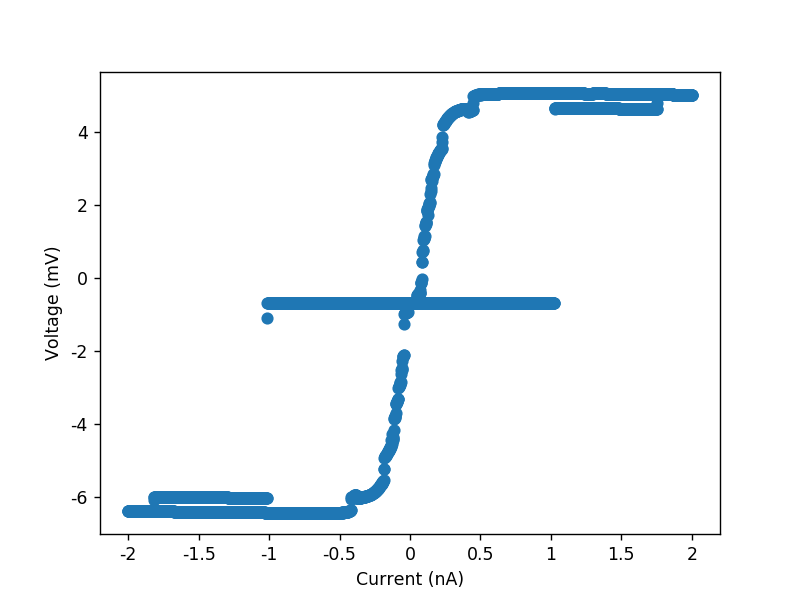

In [13]:
pbi(86, interactive = True)

**Vg = 5.7mV**

**N = 12** 

**Rn_tot = 83k**


In [18]:
83/12

6.916666666666667

In [20]:
Vg = 6.175e-3
Rn_tot = 80.1e3

## IVC fine scan

<IPython.core.display.Javascript object>


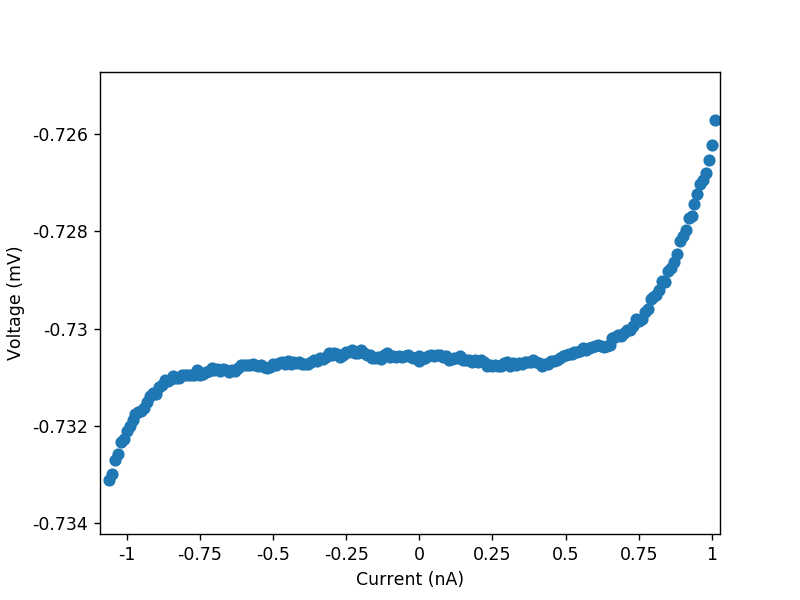

In [19]:
pbi(208, interactive = True)

**Ro_tot = 734 Ohm**

**Isw = 90.6nA**

In [23]:
Ro_tot = 558e3
Isw = 0.11e-9
N  = 30
Vo_tot = 219e-6

# B scan

<IPython.core.display.Javascript object>


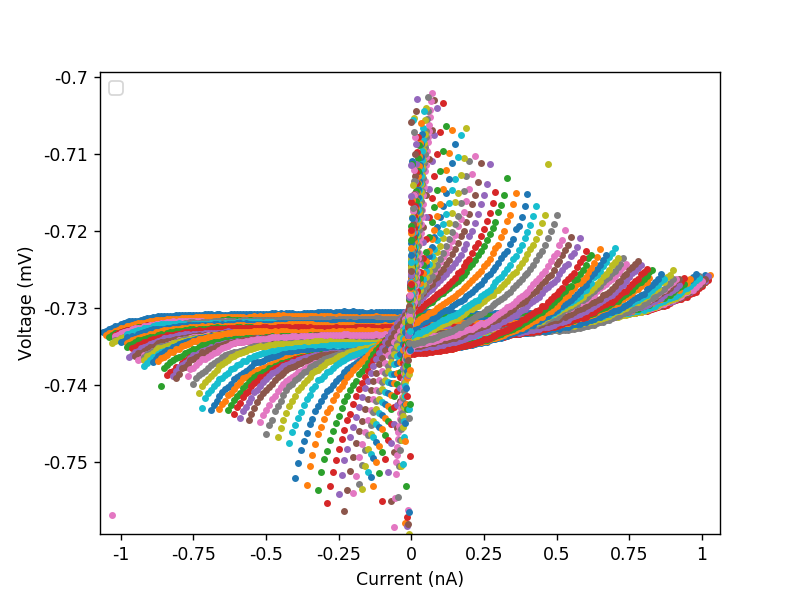

No handles with labels found to put in legend.


In [23]:
bpbi(range(208, 293), ls = '', marker = '.')

# Datatable update

In [28]:
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055B1N2,40.0f,185.9m,2.5,106.5n,110.0p,30,2.0,2.7k,80.1k,18.6k,NaN,558.0k,219.0u,Fin,measd_lv,1.9


In [29]:
ft.to_excel("..\chain table.xlsx")

In [30]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)

show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055B1N2,40.0f,185.9m,2.5,106.5n,110.0p,30,2,2.7k,80100,18.6k,NaN,558.0k,219.0u,Fin,measd_lv,1.9
